# Convolutional Networks 


For data arranged in a grid, such as an image, points in close to each other tend to have highly correlated values. This is powerful prior knowledge of the data and can be used to encode strong inductive biases into the network, leading to models with fewer parameters and better generalization accuracy. An architectural approach to grid data is the convolutional neural network, which by using filters, is designed to encode invariances and equivariances specific to image-like data. A CNN can be viewed as a sparsely connected multilayer network with parameters sharing.


* Invariant: a property of an object which remains unchaged after operations or transformations of a certain type.

* Equivariance: a form of symmetry for functions from one space with symmetry to another. (i.e. applying a symmetry transformation and then computing the function produces the same result as computing the function and then applying the transformation.)

To exploit the two-dimensional structure of image data to create strong inductive biases, four interrelated concepts can be applied: hierarchy, locality, equivariance and invariance.

Consider a single unit in the first layer of a neural network that takes as input the pixel values from a small rectangular region or patch of the image. This patch is known as the receptive field of that unit and it captures the local structure. By assigning weight values associated with this unit, this unit can learn useful low-level features. The output of this unit is given by the usual functional form of a weighted linear combination of the input values, tranformed by a non-linearity:

\begin{equation}
z = ReLU(\textbf{w}^T \textbf{x} + w_0)
\end{equation}

where $\textbf{w}$ and $w_0$ are the weights and bias, respectively and $\textbf{x}$ is a vector of pixel values for the receptive field. As there is on eweight associated with each input pixel, the weights themselves form a small two-dimensional grid known as a filter or kernel, which can also be visulaized as an image:

# ![Receptive Field - Bishop pg. 291](./figures/receptive_field.png)

The solution for $x$ that maximizes the response $w^T x + w_0$ assuming the weights and biases are fixed and that the size of $x$ is normalized is in the form $x = \alpha w$. This is effectively saying that that the maximum response will be obtained when the filter detects a patch that looks like the filter itself. This is a feature detector when $w^Tx > -w_0$. The units of the the hidden layer form a feature map in which all the units share the same weights. If a local patch of an image produces a particular response in the unit connected to that patch, then the same set of pixel values at a different location will produce the same response in the corresponding translated location in the feature map. This is one example of (translational) equivariance.

A convolution of an image $I(j \times k)$ with a filter $K(l \times m)$ is given as follows (omitting the non-linearity):

\begin{equation}
C = I * K = C(j, k) = \sum_l \sum_m I(j+l, k+m)K(l, m)
\end{equation}

This strictly speaking is a cross-correlation, not a convolution.

# ![Convolution](./figures/convolution.png)

If the image ($J \times K$) is convolved with a filter ($M \times M$), the resulting feature map will be of dimension $(J-M+1) \times (K-M+1)$.

### Padding
In cases where we would like the feature map to be the same size as the input, padding can be used. This means that pixels are added around the outside. For padding of $P$ pixels, the output map has dimension $(J+2P-M+1) \times (K+2P-M+1)$. $P=0$ is known as a *valid* convolution, while $P=(M-1)/2$ is known as a *same* convolution. Usually, the padding values are set to zero. Padding can also be applied to feature maps in deeper layers, not just input images.

### Stride 

Typicallym images are large and filters are small such that $M << J, K$. The feature map then is of similar dimensionality to the original image and may be identical if padding is used. If feature maps that are significantly smaller than the input is required, strides can be applied. This means that the filter is moved across the image in steps of $S$ pixels. The resulting feature map then has dimension $\lfloor (J-M+2P)/S - 1 \rfloor \times \lfloor (K-M+2P)/S - 1\rfloor$. ($\lfloor$ denotes the floor function, the largest integer less than or equal to the quantity in the brackets). For large images and small filters, the image map will be roughly a factor of $1/S$ smaller than the image. 

### Multi-dimensional convolutions 

Typicall each pixel in an image has three values $(R, G, B)$ that represent the colour of the pixel. These are known as channels. Convolutions can be extended to to cover multiple channels by extedning the dimensionality of the filter. An image, represented by a tensor of dimensions $J \times K \times C$ can be convolved with a filter of dimensions $M \times M \times C$ to produce a feature map of dimensions $(J-M+1) \times (K-M+1) \times C$ using no padding and a stride of 1. This filter will have $M^2C$ weight parameters. Each filter is analogous to a single hidden node in a fully connected network and can be used to detect a single feature. Therefore, to build more flexible models, one must simply include more filters which each have their own set of learnable parameters giving rise to its own feature map. Each of these separate feature maps are also known as channels. The filter tensor now has dimensionality of $M \times M \times C \times C_{OUT}$ where $C$ is the number of input channels and $C_{OUT}$ is the number of input channels. Each channel will have its own bias parameter so the total number of parameters will be $(M^2C + 1) C_{OUT}$. 

# ![Convolution over channels](./figures/convolution_over_channels.png)


### Pooling (Down-sampling)

In all forms of CNNs, a desired property is that the network can learn a hierarchical structure in which complex features at a particular level are built up from simplier features at a previous level. It is also important that learnt features are invariant to small translations of input features. Both desiderata can be achieved using pooling layers applied after convolutional layers. Along with building in some local translational invariance, pooling can also be used to reduce the dimensionality of the representation by down-sampling the feature map. (In a similar way that strides greater than one can in a convolutional layer). 

The output of a pooling unit is a simple fixed function of its inputs, and there are no learnable parameters in pooling. For example, max-pooling in which each unit simply outputs the $max$ function applied to the input values. Or, *average* pooling which the pooling function computes thr average of the values in the corresponding receptive field in the feature map. (All pooling functions introduce some degree of local translation invariance). 

# ![Max Pooling](./figures/max_pooling.png)

The activation of a unit in a feature map can be interpretted as measire of the strength of detection of a corresponding feature, so that the max-pooling preserves information on whether the feature is present and with strength. However, it does discard some positional information.

### Up-sampling

The reverse of the down-sampling effects of strided convolutions and pooling. This can take the form of additional learnable layers that take low-dimensional internal representations and transform them back to the original image resolution. 

For example, the reverse of max-pooling is max-unpooling which assigns the max value to the first element of the block (this is rather arbitary therefore modified approaches exist for including where this max value occured in the feature map, preserving the spatial information from the down sampling layers). Average pooling follows a similar process and can be seen in the following diagram:

# ![Unpooling](./figures/unpooling.png)


### Fully convolutional networks 

The upsampling methods above are fixed functions. Learned up-sampling can also be used which is anlogous to strided convolution for down sampling. For up-sampling, we use a filter that connects one pixel in the input array to a patch in the output array, and then chose the architecture so that as we move one step across the input array, we move two or more steps across the output array.

This is called *transpose convolution* because, when the down-sampling convolution is presented in matrix form, the corresponding up-sampling is given by the transpose matrix. It is also called 'fractionally strided convolution' because the stride of a standard convolution is the ratio of the step size in the output layer to the step size in the input layer. A network that uses no pooling layers, so that the down-sampling and up-sampling are done purley by convolutional layers is known as a *fully convolutional network*. 

In [2]:
# Example operations
import torch
from torchvision import datasets, transforms
import torch.nn as nn 
from torch.optim import AdamW
from torch.utils.data.dataloader import default_collate

In [3]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    print("MPS not available")
    device = torch.device("cpu")
print(device)

mps


In [4]:


# Define the transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor()
])

# Download and load the MNIST dataset
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True, collate_fn=lambda x: tuple(x_.to(device) for x_ in default_collate(x)))
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=1000, shuffle=False)

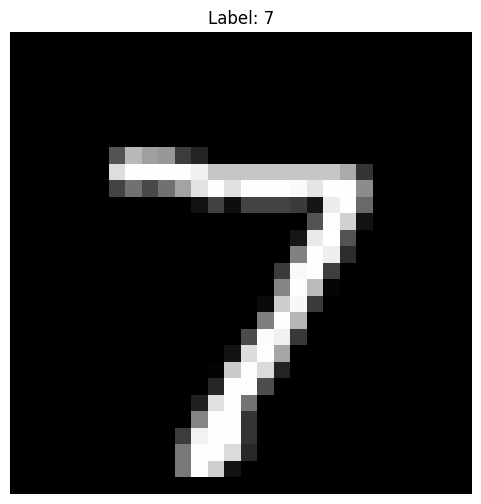

Image shape is: torch.Size([1, 28, 28])


In [5]:
import matplotlib.pyplot as plt

# Get a batch of training data
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Display the first image in the batch
plt.figure(figsize=(6, 6))
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title(f'Label: {labels[0].item()}')
plt.axis('off')
plt.show()
print(f"Image shape is: {images[0].shape}")

In [6]:
conv2d_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=(3,3), stride=2, padding=0)
tconv2d_layer = nn.ConvTranspose2d(in_channels=3, out_channels=1, kernel_size=(3,3), stride=2, padding=0)

# Number of out_channels is the number of filters/kernels - can learn more features...

print(conv2d_layer)
print(tconv2d_layer)

Conv2d(1, 3, kernel_size=(3, 3), stride=(2, 2))
ConvTranspose2d(3, 1, kernel_size=(3, 3), stride=(2, 2))


In [7]:
# Convolution and transpose convolution

x = conv2d_layer(images[0]) 

print(f"The shape of the feature map from the Convolutional layer is : {x.shape}")
print(f"The shape of the feature map from the Convolutional layer is : {tconv2d_layer(x, output_size=images[0].size()).shape}")

The shape of the feature map from the Convolutional layer is : torch.Size([3, 13, 13])
The shape of the feature map from the Convolutional layer is : torch.Size([1, 28, 28])


### Example training the MNIST for classification 

In [8]:
# Testing shapes 

conv2d_layer = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3,3), stride=2, padding=0)
x = conv2d_layer(images[0:1]) 
print(f"The shape of the feature map from the Convolutional layer is : {x.shape}")
#conv2d_layer = nn.Conv2d(in_channels=10, out_channels=5, kernel_size=(4,4), stride=2, padding=0)
#x = conv2d_layer(x) 
#print(f"The shape of the feature map from the Convolutional layer is : {x.shape}")
pooling = nn.MaxPool2d((2,2))
x = pooling(x)
print(f"The shape of the feature map from the pooling layer is : {x.shape}")
flatten = nn.Flatten(start_dim=1, end_dim=-1)
x = flatten(x)
print(f"The shape of the feature map from the pooling layer is : {x.shape}")
linear = nn.Linear(in_features=10*6*6, out_features=10)
x = linear(x)
softmax = nn.Softmax(dim=1)
x = softmax(x)

The shape of the feature map from the Convolutional layer is : torch.Size([1, 10, 13, 13])
The shape of the feature map from the pooling layer is : torch.Size([1, 10, 6, 6])
The shape of the feature map from the pooling layer is : torch.Size([1, 360])


In [9]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleDict({
            'conv2d_layer1': nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5,5), stride=1, padding=2),
            'pooling1': nn.AvgPool2d(kernel_size=(2,2), stride=2),
            'sigmoid1': nn.Sigmoid(),
            'conv2d_layer2': nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5), stride=1, padding=0),
            'sigmoid2': nn.Sigmoid(),
            'pooling2': nn.AvgPool2d(kernel_size=(2,2), stride=2),
            'flatten': nn.Flatten(),
            'linear1': nn.Linear(in_features = 5*5*16, out_features=120),
            'sigmoid3': nn.Sigmoid(),
            'linear2': nn.Linear(in_features = 120, out_features=84),
            'sigmoid4': nn.Sigmoid(),
            'linear3': nn.Linear(in_features = 84, out_features=10)
        })
    
    def forward(self, x):
        for layer in self.layers.values():
            x = layer(x)
        return x


In [10]:
model = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=1e-2)

In [11]:
model

LeNet(
  (layers): ModuleDict(
    (conv2d_layer1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (pooling1): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
    (sigmoid1): Sigmoid()
    (conv2d_layer2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (sigmoid2): Sigmoid()
    (pooling2): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (linear1): Linear(in_features=400, out_features=120, bias=True)
    (sigmoid3): Sigmoid()
    (linear2): Linear(in_features=120, out_features=84, bias=True)
    (sigmoid4): Sigmoid()
    (linear3): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [13]:
epochs = 10

for epoch in range(epochs):
    running_loss = 0
    for i, data in enumerate(train_loader):
        images, labels = data
        # zero grad
        optimizer.zero_grad()

        # forward 
        outputs = model(images)

        # loss 
        loss = loss_fn(outputs, labels)

        # backward 
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch + 1}/{epochs} - loss: {running_loss/i}")


Epoch 1/10 - loss: 0.01712007237910739
Epoch 2/10 - loss: 0.014794631013307073
Epoch 3/10 - loss: 0.013038988124199381
Epoch 4/10 - loss: 0.015535102003243933
Epoch 5/10 - loss: 0.012860254407290377
Epoch 6/10 - loss: 0.014383999507195202
Epoch 7/10 - loss: 0.01356665266738554
Epoch 8/10 - loss: 0.013556746040149762
Epoch 9/10 - loss: 0.012912988099366866
Epoch 10/10 - loss: 0.01485624890717958


In [14]:
def test_model(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient computation
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Accuracy on the test set: {accuracy:.2f}%')
    return accuracy

# After your training loop, add this code to test the model
print("Testing the model...")
test_accuracy = test_model(model, test_loader, device)

Testing the model...
Accuracy on the test set: 98.93%


In [203]:
# Evaluation metrics + visualisation - be a good time to code up classification metrics here...(Precision/recall/F1(macro/micro))

In [18]:
# Train an autoencoder - take Le-Net, use only the last layer, and reverse it to create a decoder. (Do this in the AE notebook).

In [16]:
# Work on VQ of the latent space - see how that effects accuracy

In [17]:
# Make the AE variational...